In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 73.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are

In [2]:
import pandas as pd
df = pd.read_csv("/content/twitter_multi_class_sentiment.csv")

In [3]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [5]:
df.isnull().sum()

,0
text,0
label,0
label_name,0


In [6]:
df.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [7]:
df['label'].value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


Dataset Analysis

In [8]:
import matplotlib.pyplot as plt

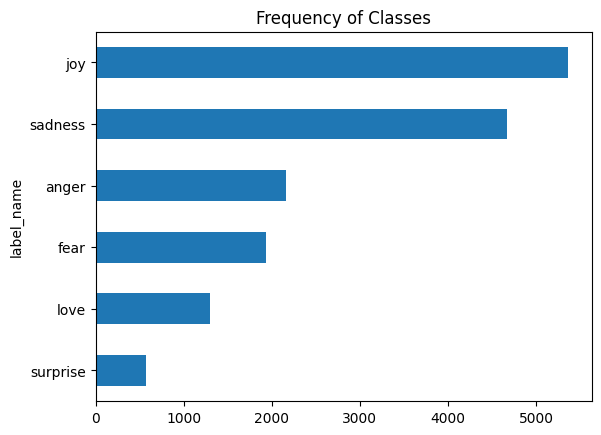

In [9]:
label_counts = df['label_name'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [10]:
df['Words_per_Tweet'] = df['text'].str.split().apply(len)
df

,text,label,label_name,Words_per_Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


<Axes: title={'center': 'Words_per_Tweet'}, xlabel='label_name'>

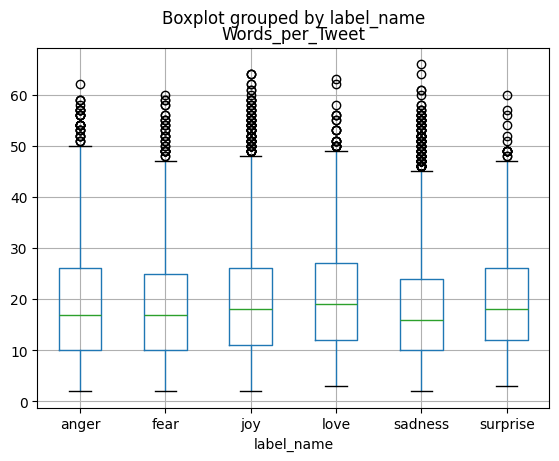

In [11]:
df.boxplot("Words_per_Tweet",by="label_name")

In [12]:
from transformers import AutoTokenizer

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "I love machine learning! Tokenization is awesome!!"
encoded_text = tokenizer(text)
print(encoded_text)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:86: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 1045, 2293, 3698, 4083, 999, 19204, 3989, 2003, 12476, 999, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [13]:
len(tokenizer.vocab),tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

Data Loader and Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.3,stratify=df['label_name'])
test, validation = train_test_split(test,test_size=1/3,stratify=test['label_name'])

train.shape,test.shape,validation.shape

((11200, 4), (3200, 4), (1600, 4))

In [15]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict(
    {
        "train": Dataset.from_pandas(train,preserve_index=False),
        "test": Dataset.from_pandas(test,preserve_index=False),
        "validation": Dataset.from_pandas(validation,preserve_index=False)
    }
)

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words_per_Tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words_per_Tweet'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words_per_Tweet'],
        num_rows: 1600
    })
})

Tokenization of the Emotion/Sentiment Data

In [16]:
dataset['train'][0],dataset['train'][1]

({'text': 'i feel bashful under his teasing scrutiny',
  'label': 4,
  'label_name': 'fear',
  'Words_per_Tweet': 7},
 {'text': 'im just figuring these lyrics out myself so apologies if im slightly wrong but it just feels a bit fake',
  'label': 0,
  'label_name': 'sadness',
  'Words_per_Tweet': 20})

In [17]:
def tokenize(batch):
  temp = tokenizer(batch['text'],padding=True, truncation=True)
  return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1045, 2514, 24234, 3993, 2104, 2010, 12216, 17423, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 10047, 2074, 23218, 2122, 4581, 2041, 2870, 2061, 25380, 2065, 10047, 3621, 3308, 2021, 2009, 2074, 5683, 1037, 2978, 8275, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [18]:
emotion_encoded = dataset.map(tokenize,batched=True,batch_size=None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [19]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words_per_Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words_per_Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words_per_Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [20]:
label2id = {x['label_name']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items()}

label2id, id2label

({'fear': 4, 'sadness': 0, 'joy': 1, 'surprise': 5, 'anger': 3, 'love': 2},
 {4: 'fear', 0: 'sadness', 1: 'joy', 5: 'surprise', 3: 'anger', 2: 'love'})

Model Building

In [21]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [22]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [23]:
model.config.id2label
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.46.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [24]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt,id2label=id2label,label2id=label2id)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [26]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.46.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [27]:
from transformers import TrainingArguments

batch_size = 64
training_dir = "bert_base_train_dir"

training_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm = False
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [28]:
#Build compute metrics function
!pip install evaluate
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics_evaluate(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions,axis=1)
  return accuracy.compute(predictions=predictions,references=labels)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.0 MB/s eta 0:00:00


In [29]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  acc = accuracy_score(labels,preds)
  f1 = f1_score(labels,preds,average="weighted")

  return {"accuracy": acc, "f1": f1}

Build Model and Trainer

In [30]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotion_encoded["train"],
                  eval_dataset=emotion_encoded["validation"],
                  tokenizer=tokenizer)

<ipython-input-30-c0fcc40fe3ba>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args,


In [31]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [32]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.446630,0.856875,0.850375
2,No log,0.283931,0.898125,0.898646


TrainOutput(global_step=350, training_loss=0.678109610421317, metrics={'train_runtime': 382.9551, 'train_samples_per_second': 58.493, 'train_steps_per_second': 0.914, 'total_flos': 1001502421516800.0, 'train_loss': 0.678109610421317, 'epoch': 2.0})

Model Evaluation

In [34]:
preds_output = trainer.predict(emotion_encoded["test"])
preds_output.metrics

{'test_loss': 0.2942347228527069,
 'test_accuracy': 0.901875,
 'test_f1': 0.9017265333948804,
 'test_runtime': 11.7324,
 'test_samples_per_second': 272.75,
 'test_steps_per_second': 4.262}

In [35]:
preds_output.predictions

array([[ 0.51039505, -1.5959421 , -0.739968  ,  3.452278  , -0.30723146,
        -1.2465038 ],
       [-1.4911354 ,  4.097188  ,  0.25778174, -2.0433855 , -0.68334883,
         0.33469582],
       [-0.950537  ,  4.3515067 , -0.49787483, -0.9454943 , -0.8670357 ,
        -0.65450466],
       ...,
       [-0.1375879 , -1.4834545 , -1.1294206 ,  3.7478929 , -0.18432766,
        -1.2775835 ],
       [-0.7352406 ,  4.4075623 , -0.12824717, -1.1387707 , -1.0585337 ,
        -0.8346891 ],
       [ 4.2515635 , -0.83994365, -0.8662927 ,  0.9920962 , -0.6886307 ,
        -1.2885627 ]], dtype=float32)

In [36]:
y_pred = np.argmax(preds_output.predictions,axis=1)
y_pred

array([3, 1, 1, ..., 3, 1, 0])

In [38]:
y_true = emotion_encoded['test'][:]['label']

In [39]:
emotion_encoded['test'][0]

{'text': 'i feel like throughout my life to this point in time i can say that ive fucked quite a few people',
 'label': 3,
 'label_name': 'anger',
 'Words_per_Tweet': 21,
 'input_ids': [101,
  1045,
  2514,
  2066,
  2802,
  2026,
  2166,
  2000,
  2023,
  2391,
  1999,
  2051,
  1045,
  2064,
  2360,
  2008,
  4921,
  2063,
  21746,
  3243,
  1037,
  2261,
  2111,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'att

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       933
           1       0.92      0.91      0.92      1072
           2       0.79      0.77      0.78       261
           3       0.88      0.93      0.90       432
           4       0.88      0.90      0.89       387
           5       0.87      0.79      0.83       115

    accuracy                           0.90      3200
   macro avg       0.88      0.87      0.87      3200
weighted avg       0.90      0.90      0.90      3200



In [41]:
label2id

{'fear': 4, 'sadness': 0, 'joy': 1, 'surprise': 5, 'anger': 3, 'love': 2}

In [42]:
#Plot Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [43]:
cm = confusion_matrix(y_true,y_pred)
cm

array([[866,  15,   2,  32,  18,   0],
       [ 22, 980,  50,   8,   8,   4],
       [  7,  50, 201,   2,   1,   0],
       [ 19,   4,   0, 401,   7,   1],
       [  9,   5,   2,  15, 347,   9],
       [  0,  11,   0,   0,  13,  91]])

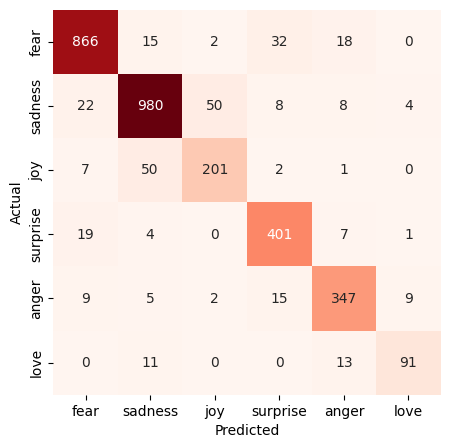

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,xticklabels=label2id.keys(),yticklabels=label2id.keys(),fmt='d',cbar=False, cmap='Reds')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Build Prediction Function and Store Model

In [46]:
text = "I am super happy today. I got it done. Finally!!"

input_encoded = tokenizer(text,return_tensors='pt').to(device)
input_encoded

{'input_ids': tensor([[ 101, 1045, 2572, 3565, 3407, 2651, 1012, 1045, 2288, 2009, 2589, 1012,
         2633,  999,  999,  102]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [48]:
with torch.no_grad():
  outputs = model(**input_encoded)

logits = outputs.logits

In [49]:
logits

tensor([[-0.7926,  4.3449, -0.1892, -0.9563, -1.2539, -0.7375]],
       device='cuda:0')

In [50]:
pred = torch.argmax(logits, dim=1).item()
pred, id2label[pred]

(1, 'joy')

In [51]:
text = "I am super happy today. I got it done. Finally!!"

def get_prediction(text):
    input_encoded = tokenizer(text,return_tensors='pt').to(device)

    with torch.no_grad():
        outputs = model(**input_encoded)

    logits = outputs.logits
    pred = torch.argmax(logits, dim=1).item()

    return id2label[pred]

get_prediction(text)

'joy'

In [52]:
trainer.save_model("bert-base-uncased-sentiment-model")

In [54]:
#use pipeline for prediction
from transformers import pipeline

classifier = pipeline("text-classification",model="bert-base-uncased-sentiment-model")
classifier([text, 'hello, how are you?', "love you", "i am feeling low"])

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'joy', 'score': 0.9694599509239197},
 {'label': 'joy', 'score': 0.8768339157104492},
 {'label': 'love', 'score': 0.8418411016464233},
 {'label': 'sadness', 'score': 0.9595224857330322}]